cortex_1/1
cortex_1/1
cortex_2/2
cortex_2/2
[225, 335, 999999999, 305, 999999999, 335, 999999999, 999999999, 315, 999999999, 335, 999999999, 275, 340, 999999999, 315, 999999999, 999999999, 260, 999999999, 999999999, 999999999, 215, 999999999, 205, 999999999, 220, 270, 999999999, 290, 999999999, 285, 999999999, 999999999, 205, 999999999, 285, 290, 999999999, 200, 240, 270, 999999999, 315, 999999999, 365, 999999999, 999999999, 340, 999999999, 305, 999999999, 310, 200, 999999999, 340, 999999999, 999999999, 330, 999999999, 999999999, 999999999, 300, 999999999, 335, 999999999, 235, 245, 999999999, 240, 999999999, 300, 999999999, 999999999, 240, 999999999, 305, 215, 999999999, 330]
[260, 320, 999999999, 275, 999999999, 335, 999999999, 999999999, 275, 999999999, 275, 999999999, 350, 275, 999999999, 335, 999999999, 999999999, 305, 999999999, 999999999, 999999999, 510, 999999999, 360, 999999999, 400, 360, 999999999, 455, 999999999, 365, 999999999, 999999999, 360, 999999999, 400, 360, 999999999,

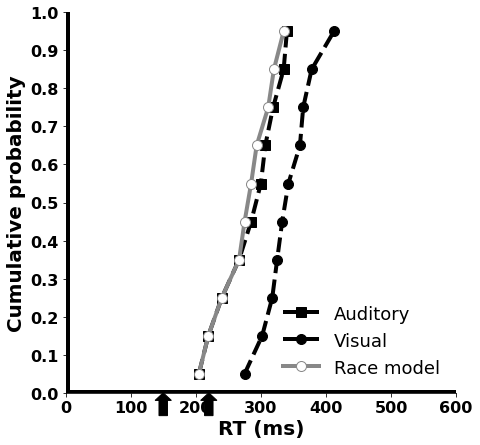

In [22]:
from src.nest.plots.generate import moving_average_plot_no_save
from src.nest.output.rates import calculate_response_times
import json
import matplotlib.pyplot as plt
import numpy as np

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    try:
        pdf = count / sum(count)
    except:
        pdf = 0
    cdf = np.cumsum(pdf)
    return bins_count, cdf


ids = [524, 525]
th = 15
# plots = [
#     ['0', 'Auditory', '--s', '#f781bf', '#f781bf'],
#     ['1', 'Visual', '--o', '#377eb8', '#377eb8']
# ]
plots = [
    ['0', 'Auditory', '--s', '#000', '#000'],
    ['1', 'Visual', '--o', '#000', '#000']
]
# figure, axis = plt.subplots(2, 1, figsize=(10, 10))
# plt.setp(axis, xlim=(0, 600), ylim=(0, 1.1))
plt.figure(figsize=(7, 7))
plt.xlim(0, 600)
plt.ylim(0, 1)
plt.xlabel("RT (ms)", fontsize=20, weight="bold")
plt.ylabel("Cumulative probability", fontsize=20, weight="bold")
plt.axhline(linewidth=7, color='black')
plt.axvline(linewidth=7, color='black')
plt.xticks(fontsize=16, weight="bold")
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=16, weight="bold")

# 68 is AUDITORY for 100 times
# 91 is VISUAL for 100 times
# 93 is BOTH, MERGED for 100 times
# 100 is BOTH, DIFFERENT CORTEXES for 50 times

response_times = []
for index, plot in enumerate(plots):
    response_times.append([])
    response_times_complete = []
    for id in ids:
        sim = 'cortex_'+str(index+1)+'/'+str(index+1)
        print(sim)
        with open('output/executions/'+str(id)+'/simulations/decision_making_nrp/'+sim+'/bin_rates_A_test_0.json', 'r') as j:
            bin_rates_A_complete = json.loads(j.read())
        with open('output/executions/'+str(id)+'/simulations/decision_making_nrp/'+sim+'/bin_rates_B_test_0.json', 'r') as j:
            bin_rates_B_complete = json.loads(j.read())

        ma_rates_A, times_A = moving_average_plot_no_save(bin_rates_A_complete)
        ma_rates_B, times_B = moving_average_plot_no_save(bin_rates_B_complete)

        trial_time = 3000
        bin_size = 5

        th = 15
        resp = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
        for rt in resp:
            if rt == 999999999:
                response_times[index].append(rt)
            else:
                response_times[index].append(rt%1000)
                response_times_complete.append(rt%1000)

        resp = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
        for rt in resp:
            if rt == 999999999:
                response_times[index].append(rt)
            else:
                response_times[index].append(rt%1000)
                response_times_complete.append(rt%1000)

    bins_count, cdf = cdf_calc(response_times_complete)

    perc = []
    for i in np.arange(0.05, 1.0, 0.1):
        perc.append(np.percentile(response_times_complete, i*100))

    # axis[0].plot(bins_count[1:], cdf, '--o', label=plot[1], color=plot[2])
    # axis[1].plot(perc, np.arange(0.05, 1.0, 0.1), '--o', label=plot[1], color=plot[2])
    plt.plot(perc, np.arange(0.05, 1.0, 0.1), plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4], markersize=10, linewidth=4)

race_model = np.minimum.reduce([response_times[0], response_times[1]])
race_model = [v for v in race_model if v != 999999999]

bins_count_racemodel, cdf_racemodel = cdf_calc(race_model)

perc = []
for i in np.arange(0.05, 1.0, 0.1):
    perc.append(np.percentile(race_model, i*100))
# axis[0].plot(bins_count_racemodel[1:], cdf_racemodel, '--o', label="Race model", color="crimson")
# axis[1].plot(perc, np.arange(0.05, 1.0, 0.1), '--o', label="Race model", color="crimson")
# plt.plot(perc, np.arange(0.05, 1.0, 0.1), '-o', label='Race model', color="#b30000", markerfacecolor="white", markersize=7)
plt.plot(perc, np.arange(0.05, 1.0, 0.1), '-o', label='Race model', color="#888", markerfacecolor="white", markersize=10, linewidth=4)

print(response_times[0])
print(response_times[1])

plt.legend(loc="lower right", frameon=False, prop={'size': 18})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.arrow(150, -0.06, 0, 0.04, color="#000", width=13, head_width=25, head_length=0.02, clip_on=False)
plt.arrow(220, -0.06, 0, 0.04, color="#000", width=13, head_width=25, head_length=0.02, clip_on=False)
plt.savefig('cortex_rts.png', format='png', dpi=300)
plt.show()

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9]
[8, 15, 23, 19, 23, 17, 17, 14, 26, 10, 21, 17, 24, 10, 12, 2, 24, 13, 15, 21, 6, 24, 4, 18, 13, 21, 6, 9, 12, 12, 24, 8, 19, 14, 16, 26, 7, 10, 24, 16, 12, 12, 14, 22, 19, 3, 14, 13, 22, 2, 11, 1, 6, 3, 23, 17, 6, 12, 17, 18, 4, 14, 6, 9, 19, 13, 14, 7, 23, 10, 23, 20, 16, 24, 21, 19, 10, 6, 22, 2, 25, 22, 3, 8, 8, 7, 22, 22, 19, 11, 26, 16, 8, 14, 7, 5, 18, 6, 23, 19, 17, 7, 17, 1, 3, 24, 8, 24, 1, 18, 10, 23, 8, 7, 3, 11, 25, 21, 14, 6, 3, 9, 2, 17, 13]


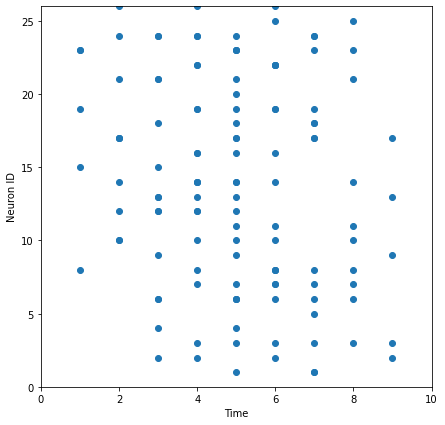

In [10]:
t=[1,1,1,1,1, 2,2,2,2,2,2,2,2,2,2,  3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,       4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,            5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,                 6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,            7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,       8,8,8,8,8,8,8,8,8,8,  9,9,9,9,9]
n=[1,2,3,4,5, 1,2,3,4,5,6,7,8,9,10, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 1,2,3,4,5,6,7,8,9,10, 1,2,3,4,5]
from random import randint
t = []
n = []
a = [5, 10, 15, 20, 25, 20, 15, 10, 5]
for i in range (1, 10):
    amount = a[i-1]
    for s in range(1, amount+1):
        t.append(i)
        n.append(randint(1, 26))

print(t)
print(n)

import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(7, 7))
plt.xlim(0, 10)
plt.ylim(0, 26)
plt.xlabel('Time')
plt.ylabel('Neuron ID')
plt.scatter(t, n)